In [85]:
filename = 'output save.csv'

In [86]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import re
import ast
from statistics import mean

In [87]:
def parseMeasurement(measurementAsString): 
    keys = ['scaler','estimator', 'generate_pandas_profiling_reports', 'process_preprocessed_data_of_uci', 'drop_correlated_features', 'drop_nan', 'encode_labels', 'minimumPercentageMissingToBeDropped',  'Execution time in seconds','AUC mean']
    result = {}
    # transform every element that is a primitiv object
    for element in keys: 
        result[element] = re.search(f'(?<={element}:, ).+?(?=\\n)',measurementAsString).group(0)
    # transform the oneHotEncoded features to a list by extracting the String from the measurement including its literals
    result['oneHotEncodedFeatures'] = ast.literal_eval(re.search(f'(?<=oneHotEncodedFeatures:, )\[.*?\]',measurementAsString).group(0).replace(';',', '))
    # transform the AUC features to a list by extracting the String from the measurement including its literals
    result['AUC'] = ast.literal_eval(re.search(f'(?<=AUC:, )\[.+?\]',measurementAsString).group(0).replace(';',', '))
    # transform the best_params to a dict by extracting the String from the measurement including its literals
    result['best_params'] = ast.literal_eval(re.search('(?<=best_params:, )\{.*?\}',measurementAsString).group(0).replace(';',', '))
    # transform the parameters to a dict by extracting the String from the measurement including its literals
    ## because not all types in the dict are nativly available from python encode these objects as strings they can be processed if needed.
    ### get the string
    temp_parameters = re.search('(?<=parameters:, )\{.*?\}',measurementAsString).group(0)
    ### encode range objects
    temp_parameters = re.sub(r'range(\(.*?\))',r"'range\1'",temp_parameters)
    #### encode np.arrays as strings
    temp_parameters = re.sub(r'array(\(.*?\))',r"'array\1'", temp_parameters)
    result['parameters'] = ast.literal_eval(temp_parameters.replace(';',', '))
    # get the precision
    result['precision'] = [float(element) for element in re.search('(?<=precision,).+?(?=\\n)',measurementAsString).group(0).split(',')[2].split(';')]
    result['recall'] = [float(element) for element in re.search('(?<=recall,).+?(?=\\n)',measurementAsString).group(0).split(',')[2].split(';')]
    result['f1-score'] = [float(element) for element in re.search('(?<=f1-score,).+?(?=\\n)',measurementAsString).group(0).split(',')[2].split(';')]

    return result

In [88]:
with open(filename) as file: 
    file_content = file.read()
    file_content = re.sub('\\n *(?=\\d)','',file_content)
    file_content = re.split('(?=scaler:)', file_content)
    measurements = [parseMeasurement(ele) for ele in file_content if not( re.match('\\n+', ele) or re.match('Skipping', ele))]

In [93]:
measurements[0]

{'scaler': 'MaxAbsScaler',
 'estimator': 'SVC',
 'generate_pandas_profiling_reports': 'False',
 'process_preprocessed_data_of_uci': 'False',
 'drop_correlated_features': 'False',
 'drop_nan': 'True',
 'encode_labels': 'True',
 'minimumPercentageMissingToBeDropped': '12',
 'Execution time in seconds': '868.4448435306549',
 'AUC mean': '77.4563492063492',
 'oneHotEncodedFeatures': ['cp', 'restecg'],
 'AUC': [0.7777777777777778,
  0.7500000000000001,
  0.8726190476190476,
  0.7730158730158729,
  0.8027777777777778,
  0.703968253968254,
  0.7611111111111112,
  0.8297619047619048,
  0.801984126984127,
  0.6726190476190476],
 'best_params': {'classification__C': 130,
  'classification__degree': 3,
  'classification__gamma': 0.001,
  'classification__kernel': 'rbf'},
 'parameters': {'classification__C': [110, 120, 130, 140, 150],
  'classification__gamma': [0.0001, 0.001, 0.01, 0.1],
  'classification__degree': [3, 4, 5, 6],
  'classification__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
 

<AxesSubplot:>

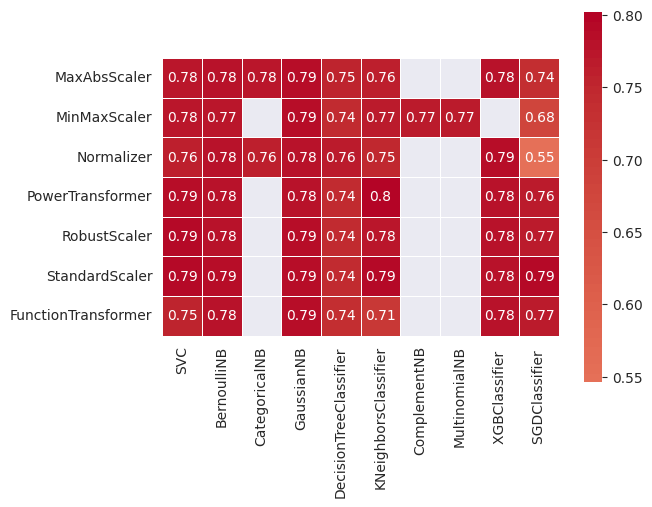

In [89]:
data = {}
for measurement in measurements:
    temp_dict = data.get(measurement['estimator'],{})
    temp_dict[measurement['scaler']] = mean(measurement['precision'])
    data[measurement['estimator']] = temp_dict
df = pd.DataFrame.from_dict(data)
df = df.apply(pd.to_numeric)
sns.heatmap(data=df, cmap="coolwarm", center=0, square=True, linewidths=.5, annot=True)

<AxesSubplot:>

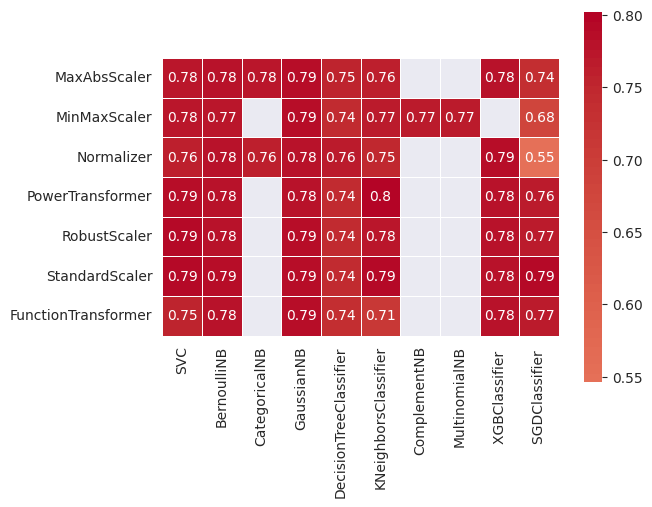

In [90]:
data = {}
for measurement in measurements:
    temp_dict = data.get(measurement['estimator'],{})
    temp_dict[measurement['scaler']] = mean(measurement['recall'])
    data[measurement['estimator']] = temp_dict
df = pd.DataFrame.from_dict(data)
df = df.apply(pd.to_numeric)
sns.heatmap(data=df, cmap="coolwarm", center=0, square=True, linewidths=.5, annot=True)

<AxesSubplot:>

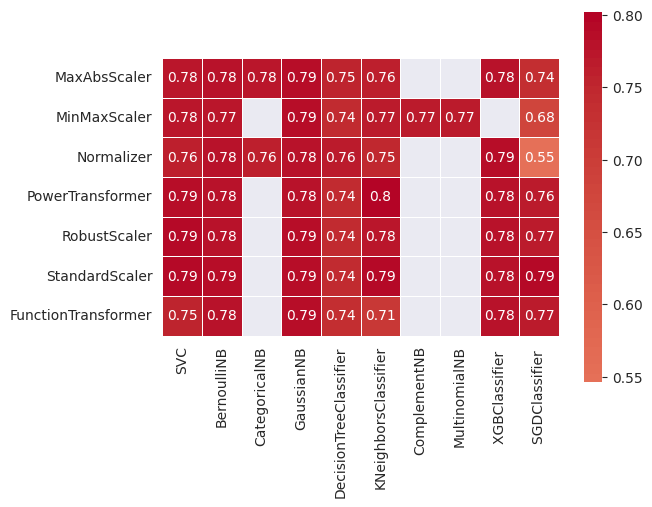

In [91]:
data = {}
for measurement in measurements:
    temp_dict = data.get(measurement['estimator'],{})
    temp_dict[measurement['scaler']] = mean(measurement['f1-score'])
    data[measurement['estimator']] = temp_dict
df = pd.DataFrame.from_dict(data)
df = df.apply(pd.to_numeric)
sns.heatmap(data=df, cmap="coolwarm", center=0, square=True, linewidths=.5, annot=True)

<AxesSubplot:>

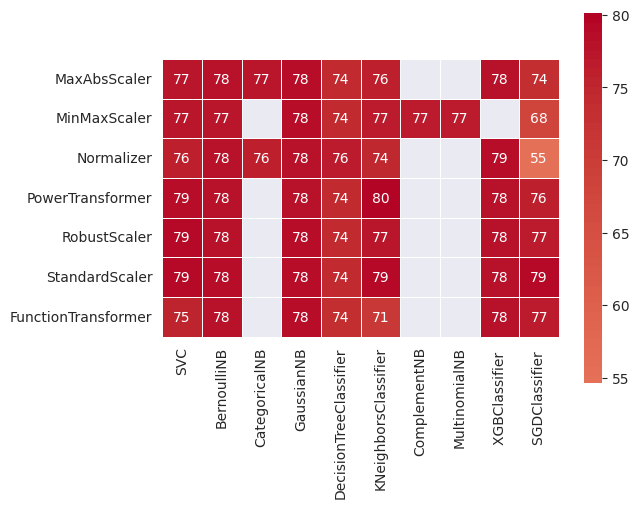

In [92]:
data = {}
for measurement in measurements:
    temp_dict = data.get(measurement['estimator'],{})
    temp_dict[measurement['scaler']] = measurement['AUC mean']
    data[measurement['estimator']] = temp_dict
df = pd.DataFrame.from_dict(data)
df = df.apply(pd.to_numeric)
sns.heatmap(data=df, cmap="coolwarm", center=0, square=True, linewidths=.5, annot=True)